In [23]:
import pandas as pd
from pandas import read_csv
crimes = read_csv('Crimes_-_2001_to_present.csv')

In [24]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [25]:
crimes.shape

(1342244, 22)

In [26]:
crimes.columns

Index([u'ID', u'Case Number', u'Date', u'Block', u'IUCR', u'Primary Type',
       u'Description', u'Location Description', u'Arrest', u'Domestic',
       u'Beat', u'District', u'Ward', u'Community Area', u'FBI Code',
       u'X Coordinate', u'Y Coordinate', u'Year', u'Updated On', u'Latitude',
       u'Longitude', u'Location'],
      dtype='object')

In [27]:
crimes.drop(['Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate',
             'Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District'], inplace=True, axis=1)

In [28]:
# convert dates to pandas datetime format
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)

In [7]:
a = crimes['Primary Type'].unique()

In [8]:
print sorted(a)

['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', 'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION', 'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION']


In [36]:
listcrimes = ['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', 'CRIM SEXUAL ASSAULT', 
              'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'HOMICIDE', 'MOTOR VEHICLE THEFT', 
               'ROBBERY', 'SEX OFFENSE', 'THEFT']
crimes = crimes[crimes['Primary Type'].isin(listcrimes)]           
                 

In [37]:
crimes.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude
Date,,,,,,,,,,
2015-03-18 19:44:00,10000092,2015-03-18 19:44:00,047XX W OHIO ST,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,41.891399,-87.744385
2015-03-18 22:45:00,10000095,2015-03-18 22:45:00,044XX S LAKE PARK AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,41.813861,-87.596643
2015-03-18 22:30:00,10000096,2015-03-18 22:30:00,051XX S MICHIGAN AVE,BATTERY,SIMPLE,APARTMENT,False,False,41.800802,-87.622619
2015-03-18 21:00:00,10000097,2015-03-18 21:00:00,047XX W ADAMS ST,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,41.878065,-87.743354
2015-03-18 22:00:00,10000098,2015-03-18 22:00:00,049XX S DREXEL BLVD,BATTERY,SIMPLE,APARTMENT,False,False,41.805443,-87.604284


In [38]:
loc_to_change  = list(crimes['Location Description'].value_counts()[:20].index)
desc_to_change = list(crimes['Description'].value_counts()[:20].index)

In [39]:
crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'

In [40]:
crimes['Primary Type']         = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

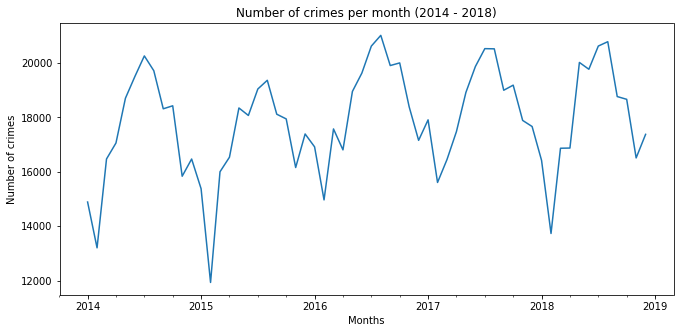

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2014 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

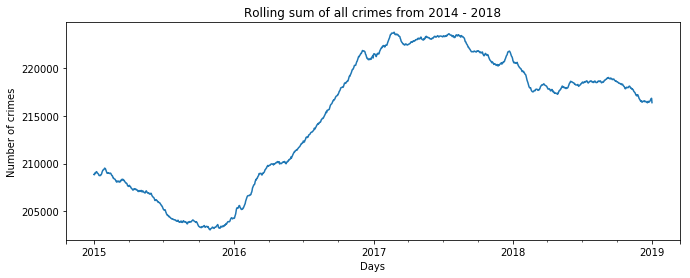

In [44]:
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2014 - 2018')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

In [45]:
import numpy as np

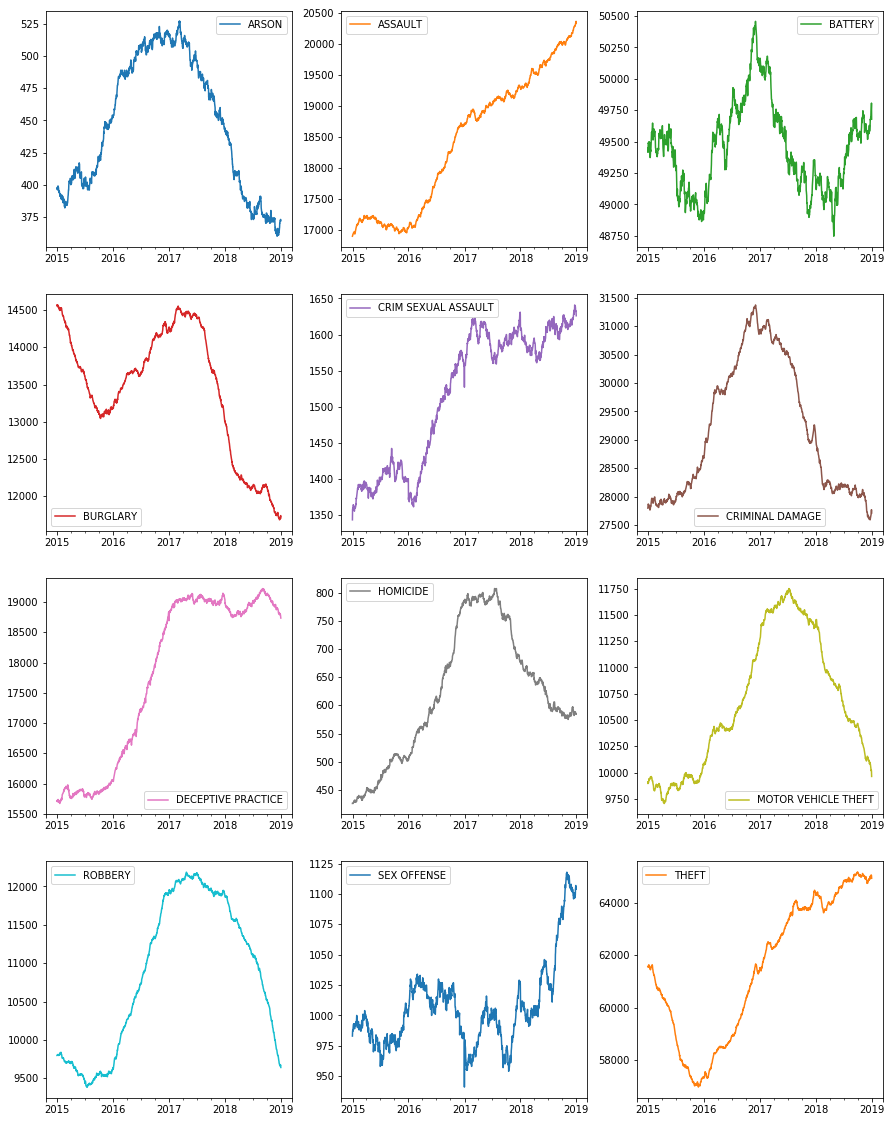

In [59]:
crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(15, 20), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

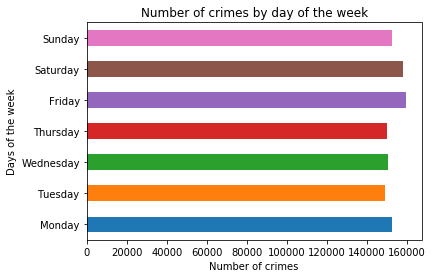

In [47]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

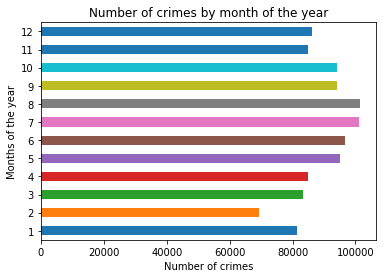

In [48]:
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

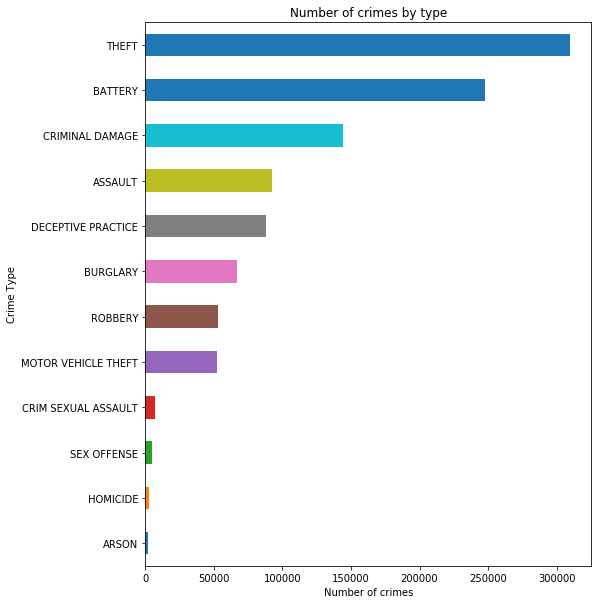

In [49]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

In [50]:
hour_by_location = crimes.pivot_table(values='ID', index='Location Description', columns=crimes.index.hour, aggfunc=np.size).fillna(0)
hour_by_type     = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.hour, aggfunc=np.size).fillna(0)
hour_by_week     = crimes.pivot_table(values='ID', index=crimes.index.hour, columns=crimes.index.weekday_name, aggfunc=np.size).fillna(0)
hour_by_week     = hour_by_week[days].T # just reorder columns according to the the order of days
dayofweek_by_location = crimes.pivot_table(values='ID', index='Location Description', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type  = crimes.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)

In [51]:
from sklearn.cluster import AgglomerativeClustering as AC

def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


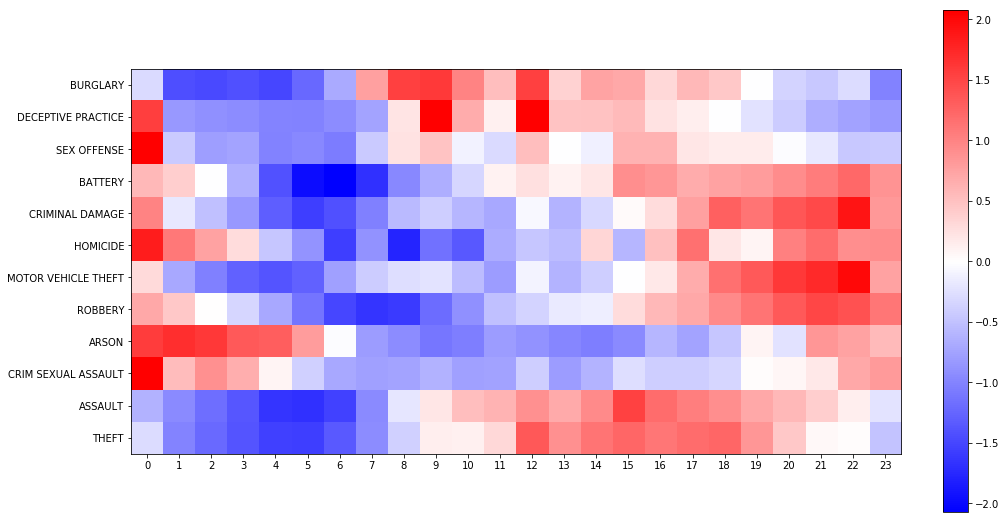

In [52]:
plt.figure(figsize=(15,12))
scale_and_plot(hour_by_type)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


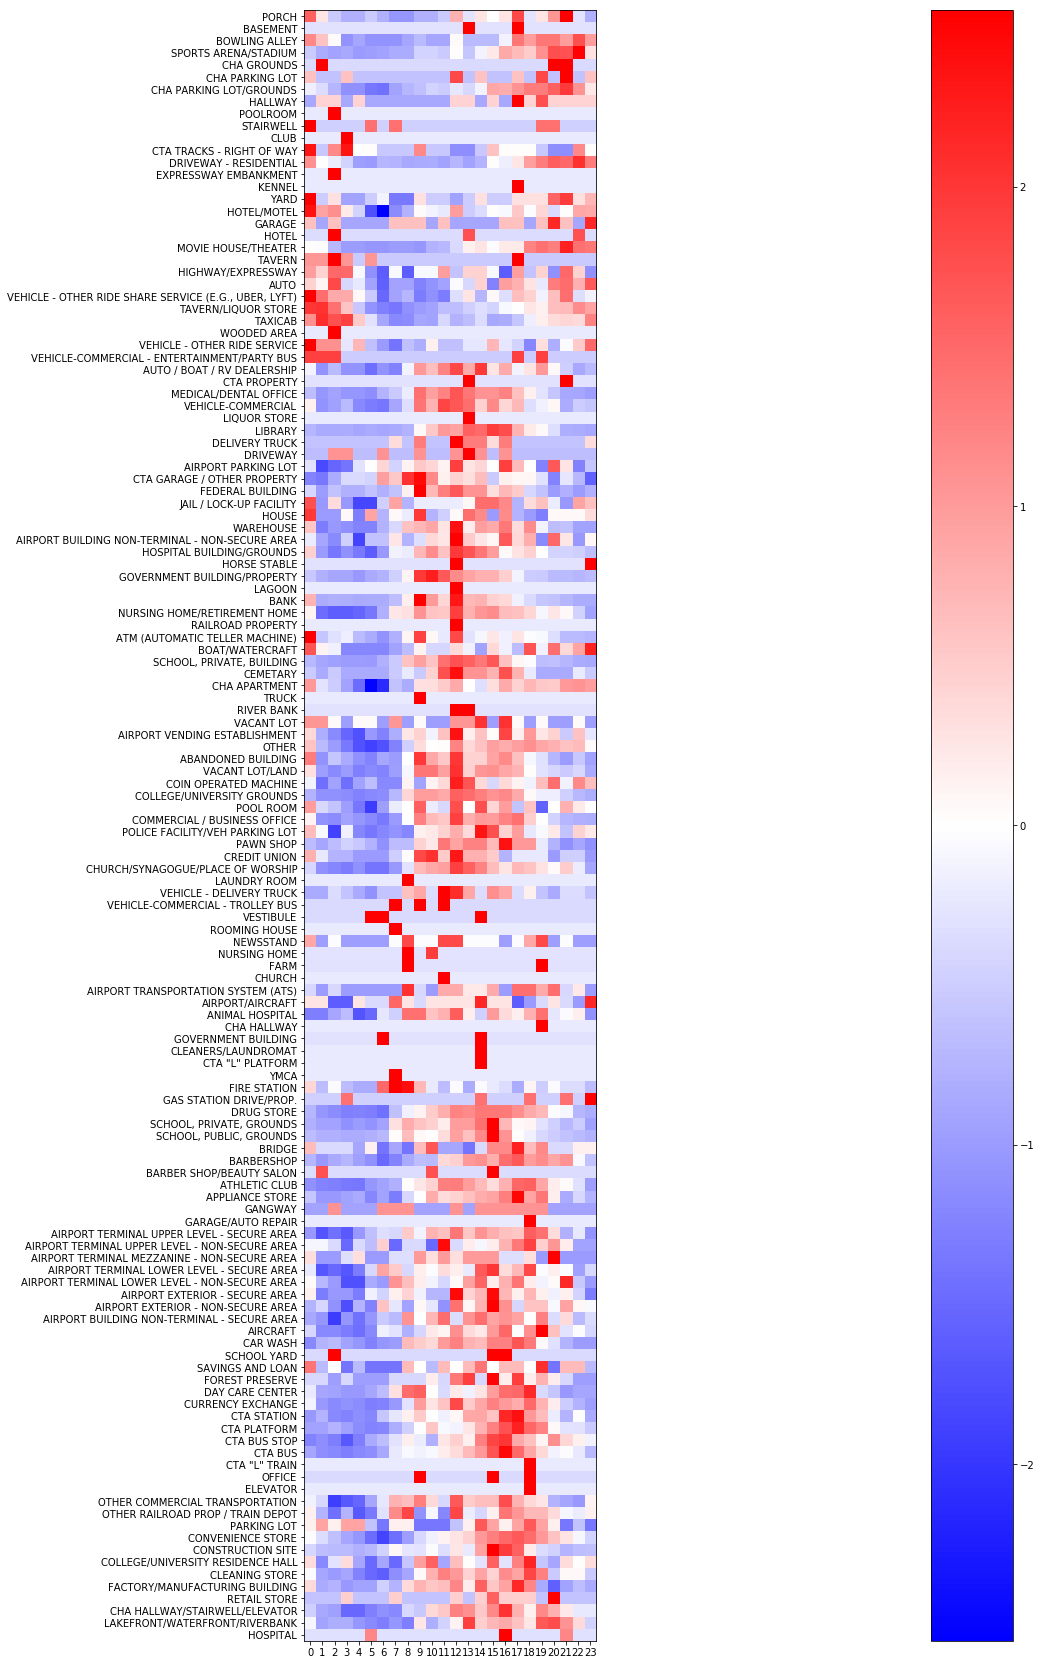

In [53]:
plt.figure(figsize=(120,30))
scale_and_plot(hour_by_location)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


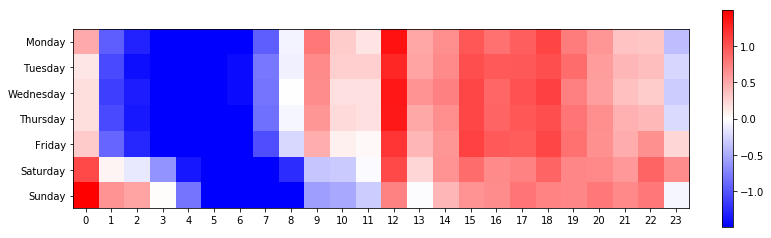

In [54]:
plt.figure(figsize=(12,4))
scale_and_plot(hour_by_week, ix=np.arange(7))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


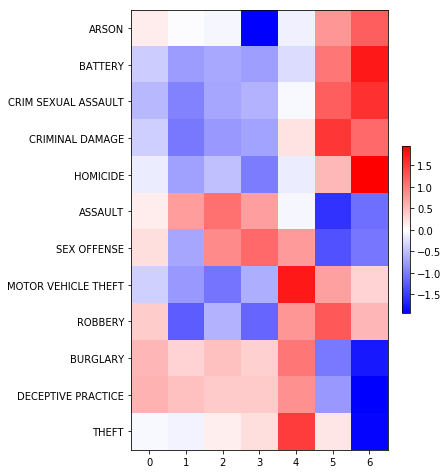

In [61]:
plt.figure(figsize=(5,10))
scale_and_plot(dayofweek_by_type)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


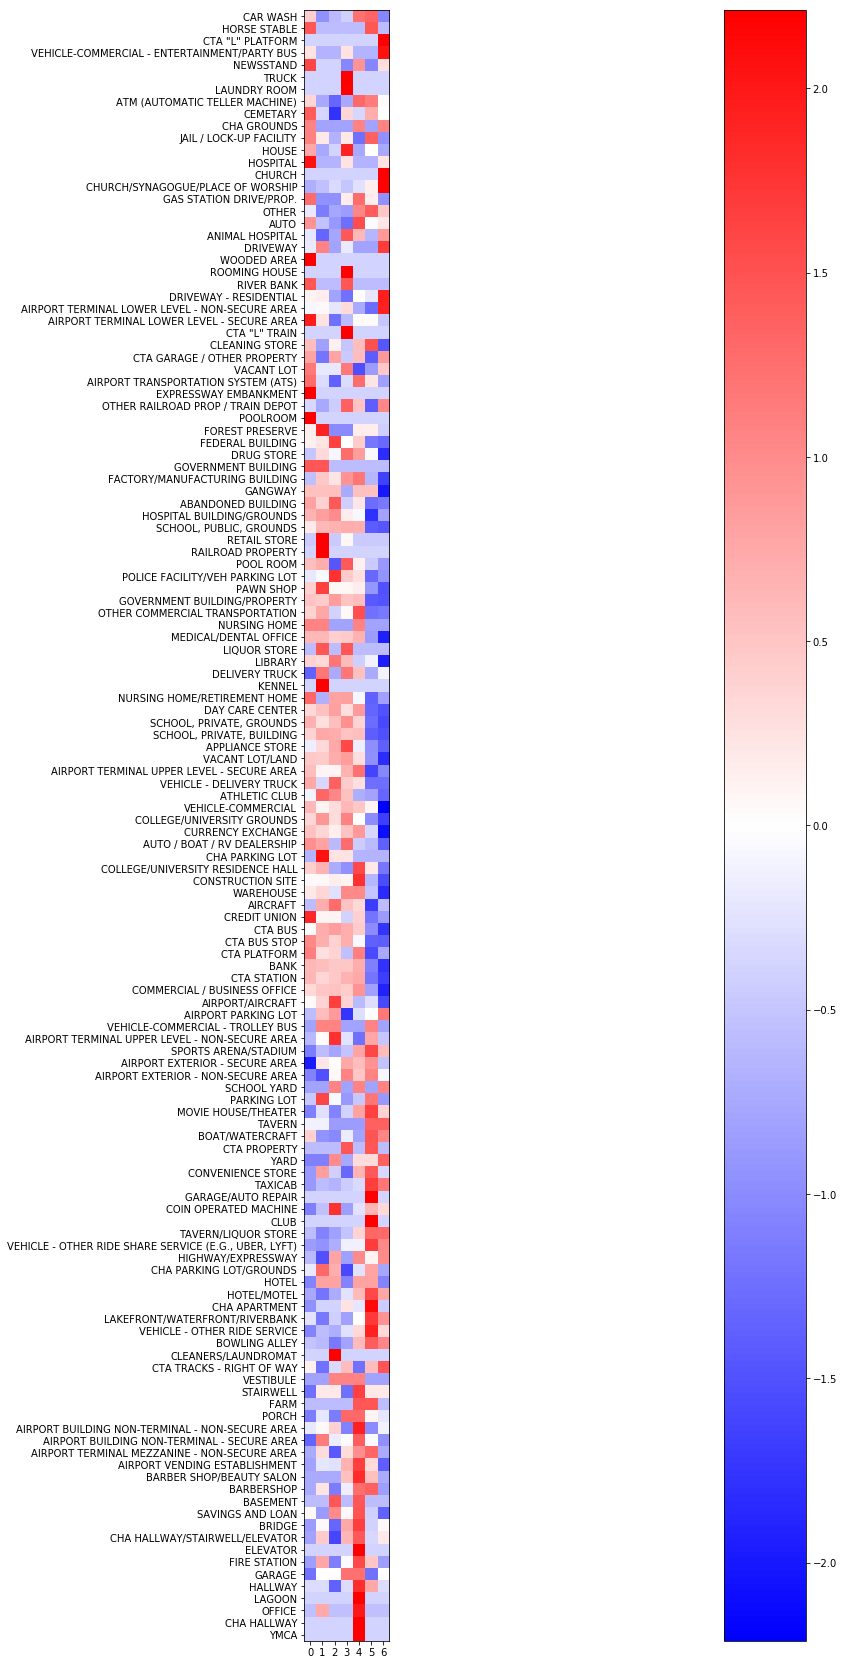

In [56]:
plt.figure(figsize=(120,30))
scale_and_plot(dayofweek_by_location)